## Primer Parcial 2024 2C - Ejercicio 4

Un experimento puso en marcha 50 turbinas durante distintos intervalos de tiempo. Se registró la proporción de turbinas que desarrollaban fisuras durante cada prueba.

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

## (a) 

Graficar la proporción de turbinas con fisuras vs la cantidad de horas de cada prueba. Justificar por qué un MLG binomial es una opción razonable para modelar la dependencia de la fracción de turbinas con fisuras respecto a la cantidad de horas. Proponer una función de
vínculo.

In [3]:
df = pd.read_csv("C:/Users/Usuario/Estadistica/Estadistica-Inferencia/turbines.csv")
X = df['Hours']
Y = df['Proportions of Fissures']

In [4]:
# Opcional: en limpio
hours = np.array([400, 1000, 1400, 1800, 2200, 2600, 3000, 3400, 3800, 4200, 4600])
proportions_of_fissures = np.array([0.0000, 0.0755, 0.0606, 0.0959, 0.1667, 0.2308, 0.2143, 0.4615, 0.6471, 0.5250, 0.5833])
X = hours
Y = proportions_of_fissures

Text(0.5, 1.0, 'Proporción de ruedas de turbinas con fisuras vs horas de uso')

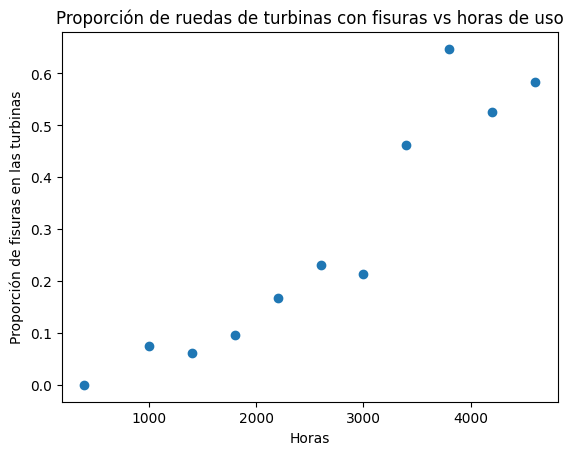

In [5]:
n = 50
fig, ax = plt.subplots()
ax.scatter(X,Y)
ax.set_xlabel("Horas")
ax.set_ylabel("Proporción de fisuras en las turbinas")
ax.set_title("Proporción de ruedas de turbinas con fisuras vs horas de uso")

Un MLG binomial con función de vínculo canónica es apropiado porque la variable dependiente $y$ es una proporción (va entre 0 y 1). Cualquier justificación que vaya en línea con este argumento fue considerada como correcta.


El modelo propuesto es entonces:
$$Y \sim Binom(\mu) $$
$$ \eta = \log(\frac{\mu}{1-\mu}) = \beta_0 + \beta_1X $$

Como vimos, la binomial es una distribución de la familia exponencial con $\theta = \log(\frac{\mu}{1-\mu})$, $\kappa(\theta) = -\log(1- \mu) = \log(1+e^\theta)$ y $\phi = 1/n$



## (b) Ajustar el MLG
Es decir, encontrar estimaciones puntuales para los parámetros de regresión $\beta$ justificando cada paso.

La likelihood es $$ \mathcal{L}(\mu) = \prod_{i=1}^{n}a(y) e^{n(y\log(\frac{\mu}{1-\mu})+\log(1-\mu))}$$

donde $\mu = \mu(\beta_0,\beta_1) = \frac{e^{\beta_0 + \beta_1x_i}}{1+e^{\beta_0 + \beta_1x_i}}$. Entonces maximizar $\mathcal{L}(\mu)$ es lo mismo que minimizar $-\log(\mathcal{L}(\mu)) $ y eso es lo que hago en el código.

In [6]:
def neg_log_likelihood_binom(beta, X, Y):
    mu_ = np.exp(np.dot(X, beta))/(1+np.exp(np.dot(X, beta)))
    return -n*np.sum(Y*np.log(mu_/(1-mu_)) + np.log(1-mu_))

b0 =  -3.911037970237237
b1 =  0.001011005195666391


C:\Users\Usuario\AppData\Local\Temp\ipykernel_2864\396492734.py:3: RuntimeWarning: divide by zero encountered in log
  return -n*np.sum(Y*np.log(mu_/(1-mu_)) + np.log(1-mu_))
C:\Users\Usuario\AppData\Local\Packages\PythonSoftwareFoundation.Python.3.11_qbz5n2kfra8p0\LocalCache\local-packages\Python311\site-packages\scipy\optimize\_numdiff.py:590: RuntimeWarning: invalid value encountered in subtract
  df = fun(x) - f0
C:\Users\Usuario\AppData\Local\Temp\ipykernel_2864\396492734.py:3: RuntimeWarning: divide by zero encountered in log
  return -n*np.sum(Y*np.log(mu_/(1-mu_)) + np.log(1-mu_))


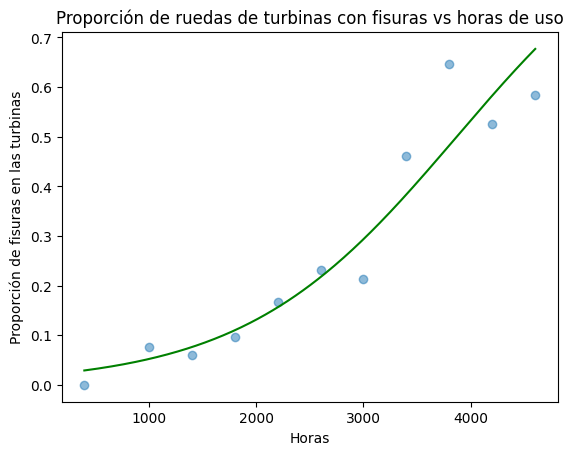

In [7]:
from scipy.optimize import minimize

intercept = np.ones(X.shape)
X_with_intercept = np.column_stack((intercept,X))

initial_beta = np.zeros(X_with_intercept.shape[1])
res_binom = minimize(neg_log_likelihood_binom, initial_beta, args=(X_with_intercept, Y))

b0 = res_binom.x[0]
b1 = res_binom.x[1]

print('b0 = ', b0)
print('b1 = ', b1)

x_range = np.linspace(X.min(), X.max(), 300)
binom_fit = np.exp(b0 + b1 * x_range)/(1+np.exp(b0 + b1 * x_range))

fig, ax = plt.subplots()
ax.scatter(X, Y, alpha=0.5)
ax.plot(x_range,binom_fit,color='g')
ax.set_xlabel("Horas")
ax.set_ylabel("Proporción de fisuras en las turbinas")
ax.set_title("Proporción de ruedas de turbinas con fisuras vs horas de uso")
plt.show()

### Comentarios sobre las correcciones de este item:

* Muchas personas escribieron la función "neg_log_likelihood_binom" sin justificar paso a paso cómo llegaron a esa definición y salteándose pasos importantes del desarrollo. En esos casos, si la likelihood que obtuvieron es la correcta y llegan a los resultados correctos, se les restaron algunos puntos pero se consideró el item como aprobado.
* Algunas personas directamente saltearon todo proceso analítico visto en clase y ajustaron los datos con statsmodels.api.GLM (jamás visto en ninguna clase de esta materia), sin mostrar qué es lo que están haciendo ni dar ninguna justificación. Si los resultados obtenidos están bien, sumaron algunos puntos (al fin y al cabo obtuvieron los coeficientes, que era lo que pedía el ejercicio), pero no aprobaron los items porque no están mencionando ni justificando los pasos que llevan a cabo las funciones de esa librería.

## (c) 

Determinar el error estándar de cada parámetro de regresión justificando cada paso

Para esto necesitamos obtener la matriz de Fischer de la distribución:

$$I = \frac{1}{\phi}X^TWX \hspace{1cm}\text{ con }W = \text{diag}(\frac{1}{V(\mu_i)(d\eta_i/d\mu_i)^2}) $$

En nuestro caso:
$$\phi = 1/n $$

$$ V(\mu) = \mu(1-\mu) $$

$$ \frac{d\eta}{d\mu} = \frac{d(\log(\frac{\mu}{1-\mu}))}{d\mu} = \frac{1}{\mu(1-\mu)}$$

por lo tanto $$I = nX^TWX \hspace{1cm}W = \text{diag}(\mu_i(1-\mu_i))$$

con $\mu = \mu(\beta_0,\beta_1) = \frac{e^{\beta_0 + \beta_1x_i}}{1+e^{\beta_0 + \beta_1x_i}}$  

Finalmente, la matriz de covarianza es $I^{-1}$ y su diagonal, las varianzas respectivas de $\beta_0$ y $\beta_1$:

In [8]:
from numpy.linalg import inv

mu = np.exp(X_with_intercept@res_binom.x)/(1+np.exp(X_with_intercept@res_binom.x))
W = np.diag(mu*(1-mu))
I = n*X_with_intercept.T@W@X_with_intercept
cov_matrix = inv(I)
cov_matrix


array([[ 1.23066780e-01, -3.46642344e-05],
       [-3.46642344e-05,  1.07938403e-08]])

In [9]:
se_b0 = np.sqrt(cov_matrix[0,0])
se_b1 = np.sqrt(cov_matrix[1,1])
print("se(b0) =",se_b0)
print("se(b1) =",se_b1)

se(b0) = 0.35080875190129035
se(b1) = 0.00010389340836140162


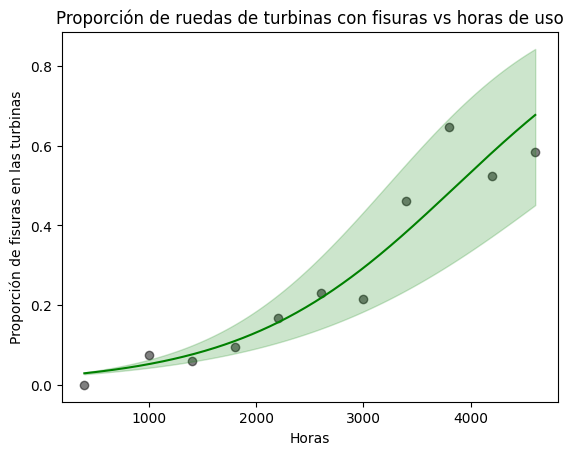

In [10]:
#muestro los errores en gráfico a partir de un IC.95 para b1 a b0 constante
eta_sup = b0 + (b1 + se_b1 *1.96)* x_range
eta_inf = b0 + (b1 - se_b1 *1.96)* x_range
mu_alto = np.exp(eta_sup)/(1+np.exp(eta_sup))
mu_bajo = np.exp(eta_inf)/(1+np.exp(eta_inf))

fig, ax = plt.subplots()
ax.scatter(X, Y, alpha=0.5,color='k')
ax.plot(x_range,binom_fit,color='g')
ax.fill_between(x_range, mu_bajo, mu_alto, alpha=0.2,color = 'g')

ax.set_xlabel("Horas")
ax.set_ylabel("Proporción de fisuras en las turbinas")
ax.set_title("Proporción de ruedas de turbinas con fisuras vs horas de uso")
plt.show()